# Rozkłady prawdopodobieństwa, a testowanie hipotez

Aby zilustrować związek pomiędzy <b> rozkładami prawdopodobieństwa</b>, a <b> testowaniem hipotez </b>, rozważmy następujący problem:

<ul>
<li> Załóżmy, że mamy grę planszową, która zależy od rzutu kostką. Oczywiście jak dostaniemy wynik $6$, to poruszamy się najszybciej. W danej grze $6$wypadła $51$ razy w ciągu $235$ rzutów. </li>
<li> Jeśli kostka jest uczciwa, oczekiwalibyśmy, że $6$ wypadnie $235/6 =39.17$ razy. </li>
<li> Czy kostka aby na pewno jest uczciwa? </li>
</ul>

In [1]:
from scipy import stats
import matplotlib.pyplot as plt
import numpy as np

Definiujemy zmienną losową o rozkładzie dwumianowym z parametrami $p=\frac{1}{6}$ oraz $n=235$.

Gdy zmienna losowa $X$ ma rozkład dwumianowy z parametrami $p$ i $n$, zapisujemy go jako $X \thicksim B(n,p)$, a gęstość wyrażona jest wzorem:
$$
P(X = k) = {n \choose k} p^k (1-p)^{n-k},
$$
gdzie
$
{n \choose k} = \frac{n!}{k!(n-k)!}.
$

# Zadanie 
Rozstrzygnij czy kostka jest symetryczna i wykonaj odpowiedni rysunek uwzględniając gęstość i dystrybuantę rozkładu dwumianowego.

Aby odpowiedzieć na to pytanie, możemy postępować w następujący sposób:
<ul>
<li> Skontrujmy rozkład dwumianowy z parametrami $n = 235$ i $p = \frac{1}{6}$. </li>
</ul>

In [10]:
n = 235
p = 1/6
dwumian = stats.binom(n, p)

<ul>
<li> Zakładamy, że kostka jest uczciwa.</li> 
<li> Obliczymy prawdopodobieństwo wypadnięcia dokładnie $51$ razy $6$, $52$ razy i itd. Następnie dodajmy te wyniki. W ten sposób obliczymy prawdopodobieństwo wypadnięcia dokładnie $51$ razy $6$ lub wyniku większego $P(X \geq 51)$ </li>
</ul>

In [11]:
checkVal = 50 
print('p-value = {0:5.4f}'.format(dwumian.sf(checkVal)))
print('p-value = {0:5.4f}'.format(1-dwumian.cdf(checkVal))) # powinno wyjść to samo

p-value = 0.0265
p-value = 0.0265


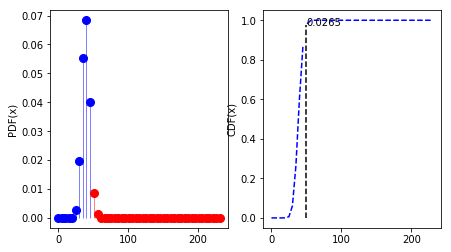

In [17]:
x0=dwumian.sf(checkVal)

x1 = np.arange(0, 50, 5)
x2 = np.arange(51, 235, 5)

figs, axs = plt.subplots(1,2, figsize=(7, 4))

axs[0].plot(x1, dwumian.pmf(x1), 'bo', ms=8, label='dwumianowy pmf')
axs[0].vlines(x1, 0, stats.binom.pmf(x1, n, p), colors='b', lw=1, alpha=0.5)
axs[0].plot(x2, dwumian.pmf(x2), 'ro', ms=8, label='dwumianowy pmf')
axs[0].vlines(x2, 0, stats.binom.pmf(x2, n, p), colors='r', lw=1, alpha=0.5)
axs[0].set_ylabel('PDF(x)')

#axs[1].plot(x, y, '#999999', lw=3)
axs[1].plot(x1, dwumian.cdf(x1), 'b--', ms=8, label='dwumianowy cdf')
axs[1].plot(x2, dwumian.cdf(x2), 'b--', ms=8, label='dwumianowy cdf')
#axs[1].set_xlabel('x')
axs[1].set_ylabel('CDF(x)')

#axs[1].text(checkVal, dwumian.cdf(checkVal), np.round(nd.cdf(checkVal),4))
#axs[1].vlines(checkVal, 0, dwumian.cdf(checkVal), linestyles='--')
axs[1].vlines(checkVal, 0, dwumian.cdf(checkVal), linestyles='--')
axs[1].text(checkVal, dwumian.cdf(checkVal), np.round(dwumian.sf(checkVal),4))
plt.show()
#print(2*x0)

In [18]:
# Ponieważ p=0.0265 < 0.05, czyli jest mało prawdopodobne, zatem obserwacja 51 szóstek wpada w "ogon" czyli nie jest uczciwa.